<a href="https://colab.research.google.com/github/Yaseerkhan001/Bike-sharing-demand-predication/blob/main/ML_Capstone_Project_1_Trial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns                

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/Bike sharing demand prediction/SeoulBikeData.csv", encoding = "unicode_escape")

In [7]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df.shape

(8760, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
df.describe(include="all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [11]:
#Checking for Duplicates
df.duplicated().sum()

0

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [14]:
df.drop(columns=['Date'],inplace=True)

In [15]:
fff = df.groupby('Functioning Day').sum()['Rented Bike Count']
fff

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

Zero bikes were rented on Non-Functioning Day. So we can remove all entries from non functioning day and then can remove the functioning day column too.


In [16]:
df1=df.drop(df[df['Functioning Day'] == 'No'].index) 

In [17]:
df1.drop(['Functioning Day'], axis = 1,inplace = True)

In [18]:
df1.shape

(8465, 15)

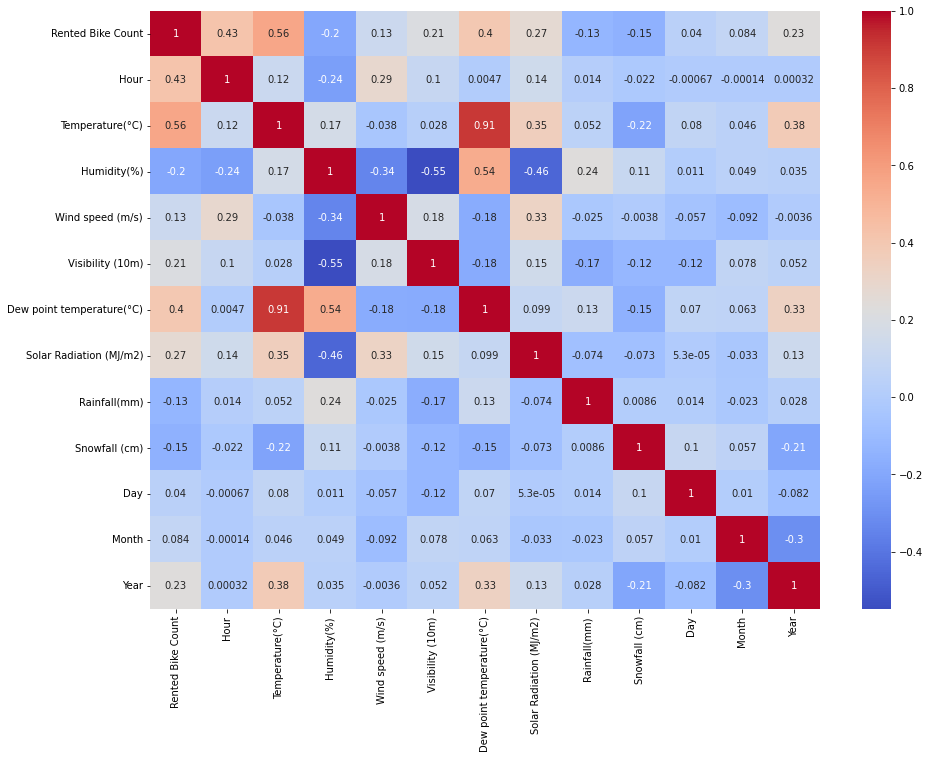

In [19]:
plt.figure(figsize=(15,11))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)

In [20]:
#Droping Dew point temperature(°C) from dataset df1 as it is highly correlated to the Temperature.
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Hour                     8465 non-null   int64  
 2   Temperature(°C)          8465 non-null   float64
 3   Humidity(%)              8465 non-null   int64  
 4   Wind speed (m/s)         8465 non-null   float64
 5   Visibility (10m)         8465 non-null   int64  
 6   Solar Radiation (MJ/m2)  8465 non-null   float64
 7   Rainfall(mm)             8465 non-null   float64
 8   Snowfall (cm)            8465 non-null   float64
 9   Seasons                  8465 non-null   object 
 10  Holiday                  8465 non-null   object 
 11  Day                      8465 non-null   int64  
 12  Month                    8465 non-null   int64  
 13  Year                     8465 non-null   int64  
dtypes: float64(5), int64(7),

In [22]:
numcol = list(set(df1.columns) - {"Seasons","Holiday"})
print(numcol)

['Wind speed (m/s)', 'Visibility (10m)', 'Day', 'Year', 'Solar Radiation (MJ/m2)', 'Temperature(°C)', 'Month', 'Humidity(%)', 'Snowfall (cm)', 'Hour', 'Rainfall(mm)', 'Rented Bike Count']


In [23]:
len(numcol)

12

In [24]:
numdf = df1[numcol]

In [25]:
numdf.head()

,Wind speed (m/s),Visibility (10m),Day,Year,Solar Radiation (MJ/m2),Temperature(°C),Month,Humidity(%),Snowfall (cm),Hour,Rainfall(mm),Rented Bike Count
0,2.2,2000,12,2017,0.0,-5.2,1,37,0.0,0,0.0,254
1,0.8,2000,12,2017,0.0,-5.5,1,38,0.0,1,0.0,204
2,1.0,2000,12,2017,0.0,-6.0,1,39,0.0,2,0.0,173
3,0.9,2000,12,2017,0.0,-6.2,1,40,0.0,3,0.0,107
4,2.3,2000,12,2017,0.0,-6.0,1,36,0.0,4,0.0,78


In [26]:
!git clone https://github.com/Yaseerkhan001/Bike-sharing-demand-prediction.git

Cloning into 'Bike-sharing-demand-prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [27]:
! pwd

/content


In [28]:
%cd Bike-sharing-demand-prediction/

/content/Bike-sharing-demand-prediction


In [29]:
! git remote -v  

origin	https://github.com/Yaseerkhan001/Bike-sharing-demand-prediction.git (fetch)
origin	https://github.com/Yaseerkhan001/Bike-sharing-demand-prediction.git (push)


In [30]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
